<a href="https://www.kaggle.com/code/sudhanshu2198/health-insurance-cross-sell-prediction?scriptVersionId=109605898" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/health-insurance-cross-sell-prediction/sample_submission.csv
/kaggle/input/health-insurance-cross-sell-prediction/train.csv
/kaggle/input/health-insurance-cross-sell-prediction/test.csv


# Data Statistics Summarization

In [2]:
data=pd.read_csv('../input/health-insurance-cross-sell-prediction/train.csv')

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Age,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Driving_License,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Region_Code,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Previously_Insured,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Annual_Premium,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Policy_Sales_Channel,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0
Vintage,381109.0,154.347397,83.671304,10.0,82.0,154.0,227.0,299.0
Response,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


In [6]:
data.describe(include='O').T

,count,unique,top,freq
Gender,381109,2,Male,206089
Vehicle_Age,381109,3,1-2 Year,200316
Vehicle_Damage,381109,2,Yes,192413


In [7]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
data.duplicated().any()

False

# Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,8)

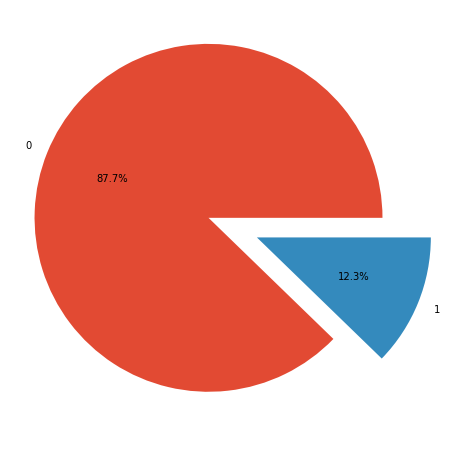

In [11]:
inter=data['Response'].value_counts()
plt.pie(inter,labels=inter.index,autopct="%0.1f%%",explode=[0.1,0.2],radius=1);

**There is class imbalance in the target variable**

In [12]:
var=['Age','Vintage','Annual_Premium','Response']

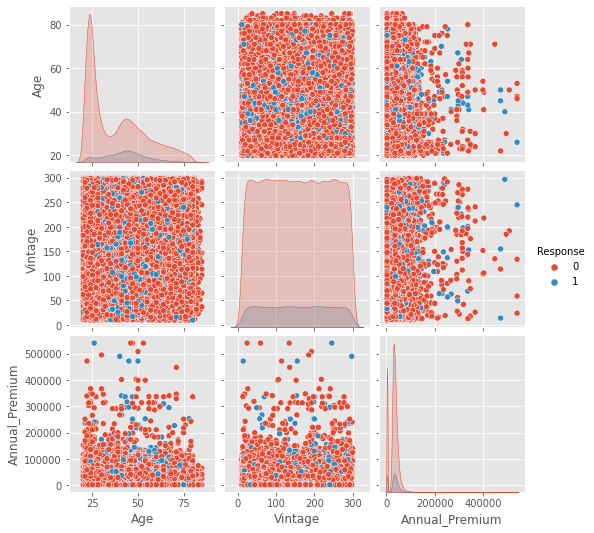

In [13]:
sns.pairplot(data[var],hue='Response');

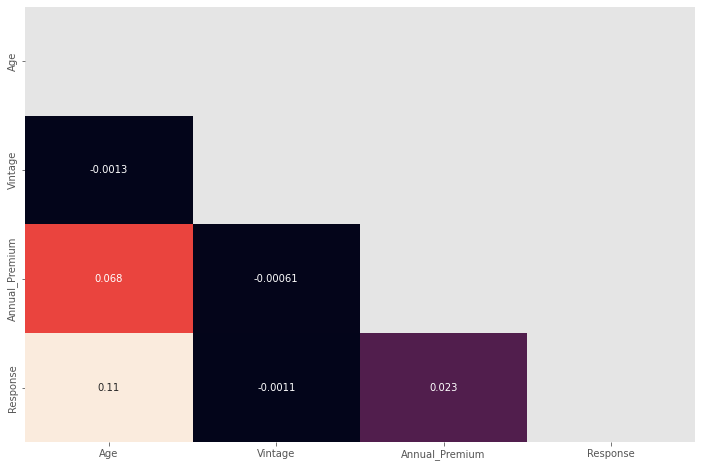

In [14]:
mask=np.triu(np.ones_like(data[var].corr()))
sns.heatmap(data[var].corr(),cbar=False,annot=True,mask=mask);

**There is no visible correlation between age,vintage,annual premium variable with response variable.**

In [15]:
def plot_num(var):
    
    plt.subplot(1,2,1)
    sns.histplot(data[var],color='#1f77b4');
    
    plt.subplot(1,2,2)
    sns.boxplot(y=data[var],color='#1f77b4');
    
    plt.tight_layout()

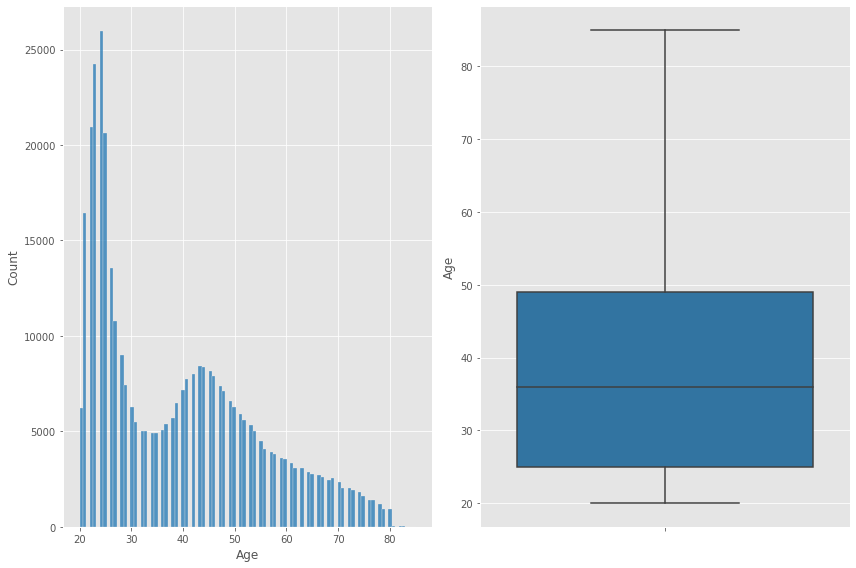

In [16]:
plot_num('Age')

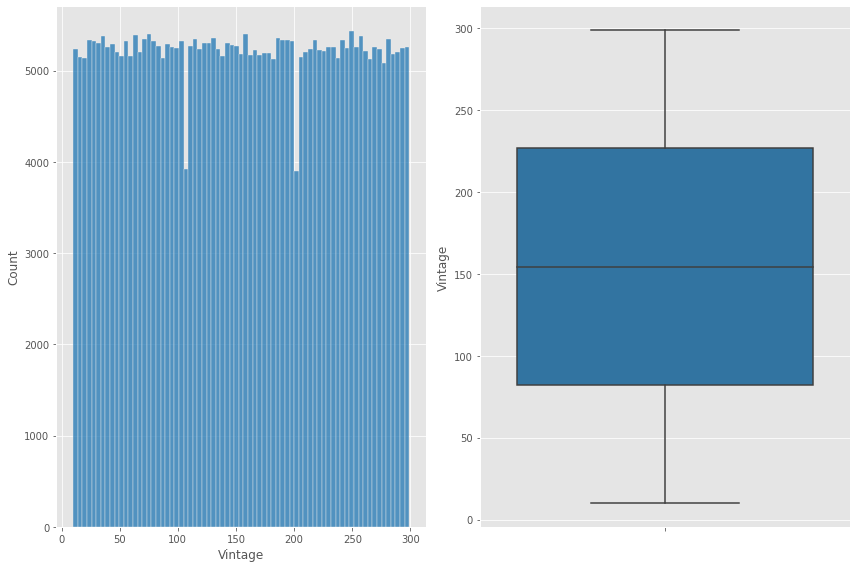

In [17]:
plot_num('Vintage')

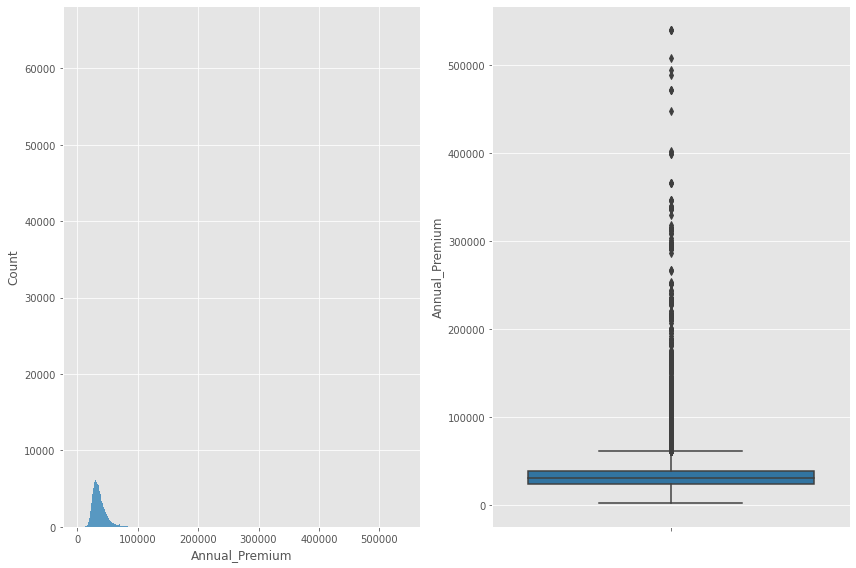

In [18]:
plot_num('Annual_Premium')

**Age variable has non gaussian distribution**

**Vintage varible has uniform distribution**

**Annual Premium follows gaussian distribution with large spike**

In [19]:
def plot_cat(var):
    
    inter=data.groupby(var)['Response'].mean()
    order=inter.index
    
    plt.subplot(1,2,1)
    sns.countplot(x=var,data=data,order=order);
    
    plt.subplot(1,2,2)
    plt.pie(inter,labels=inter.index,autopct="%0.1f%%",radius=1.2);
    
    plt.tight_layout()   
    

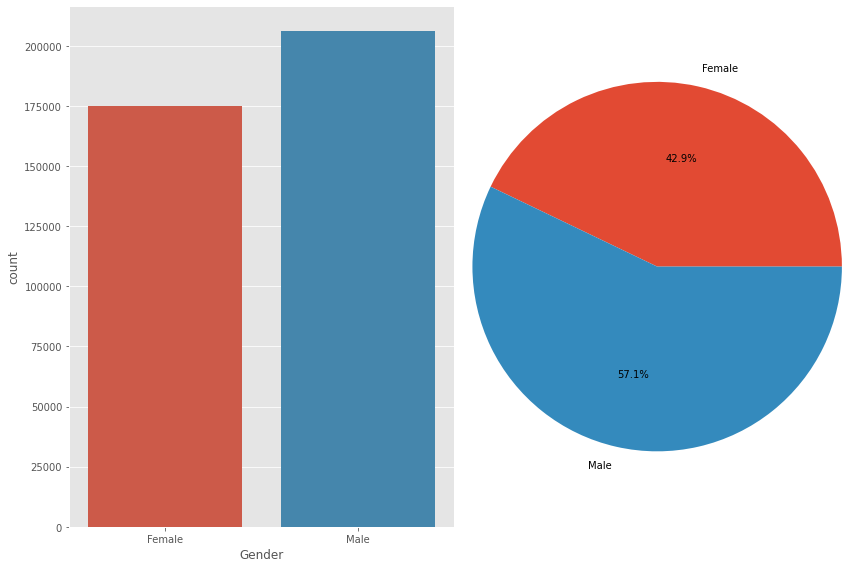

In [20]:
plot_cat('Gender')

**Not only there are more males then female in the data, but males have also shown a higher percentage of interest in vehicle insurance.**

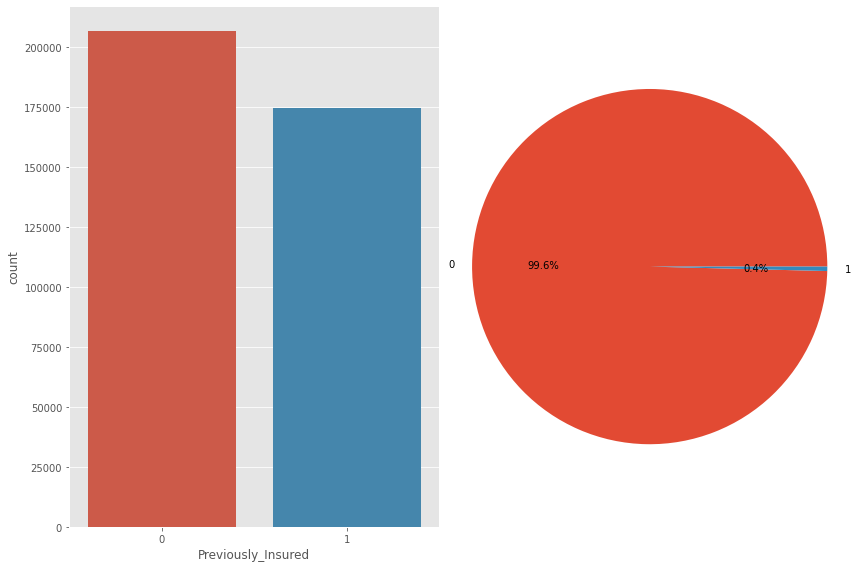

In [21]:
plot_cat('Previously_Insured')

**The majority of respondents who shown interest in insurance,do not have their vehicles insured previously.**

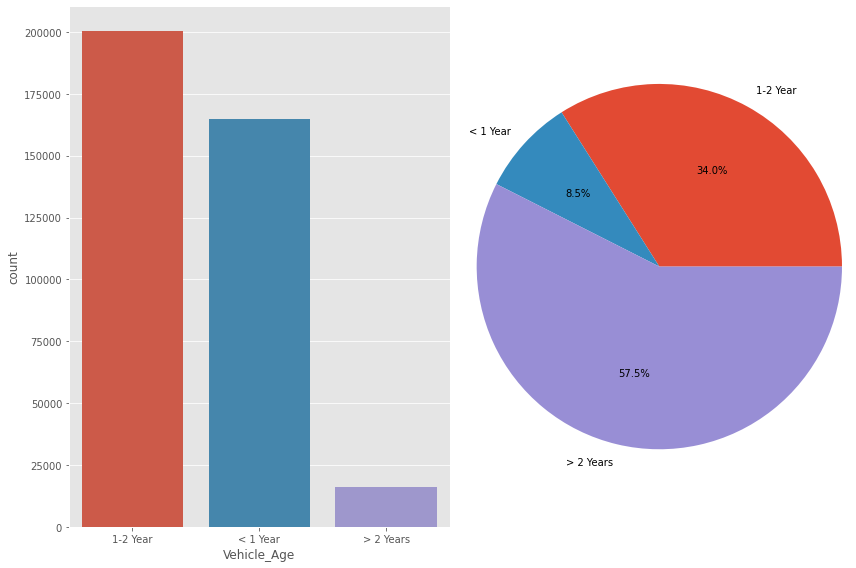

In [22]:
plot_cat('Vehicle_Age')

**Though the vehicles having age greater than 2 years are much less in comparison, respondents with those vehicles have shown greater interest followed by 1-2 year vehicle age.**

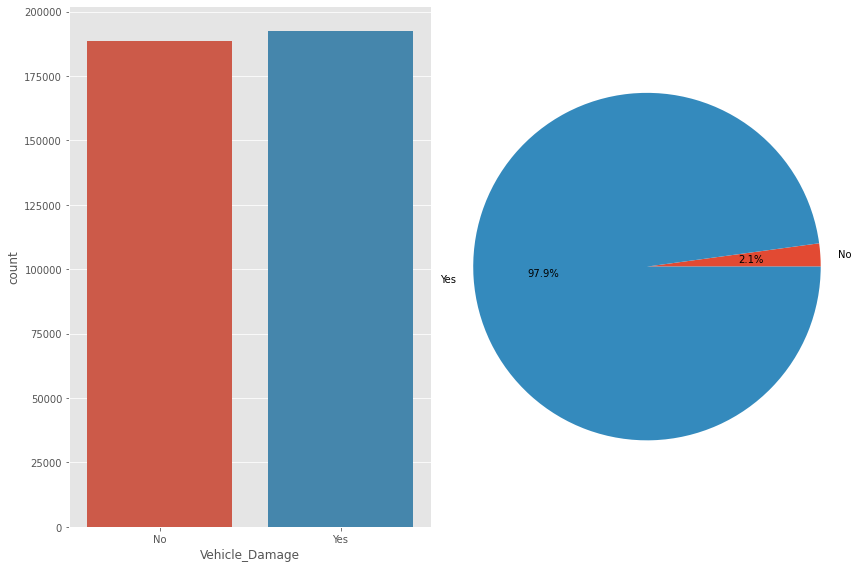

In [23]:
plot_cat('Vehicle_Damage')

**Though vehicle with damage and without damage are equal in numbers, people with previously damaged vehicels have much higher chances of buying insurance.**

# Data Preprocessing

In [24]:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import PowerTransformer

In [25]:
# Encoding categorical variables

data['Gender']=data['Gender'].map({'Female':0,'Male':1})
data['Vehicle_Age']=data['Vehicle_Age'].map({'< 1 Year':0, '1-2 Year':1,'> 2 Years':2})
data['Vehicle_Damage']=data['Vehicle_Damage'].map({'No':0,'Yes':1})

In [26]:
# transforming numerical variables
num=['Age','Vintage','Annual_Premium']

transformer=PowerTransformer()
data_num=transformer.fit_transform(data[num])

data_num=pd.DataFrame(data_num,columns=num)

In [27]:
cat=['Gender', 'Driving_License', 'Region_Code','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage','Policy_Sales_Channel', 'Response']
data_cat=data[cat]

In [28]:
data=pd.concat([data_num,data_cat],axis=1)

X=data.drop('Response',axis=1)
y=data['Response']

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=1)

# Feature Selection

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [31]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

fs= permutation_importance(model, X_test, y_test,n_repeats=30,random_state=0)

In [32]:
fs.importances_mean

array([ 2.18878189e-03, -3.02624789e-04,  2.16035615e-04, -7.04083685e-05,
        5.29156062e-05, -7.84987711e-04, -4.88704049e-03,  3.02244321e-02,
       -4.57348272e-03, -2.75685935e-03])

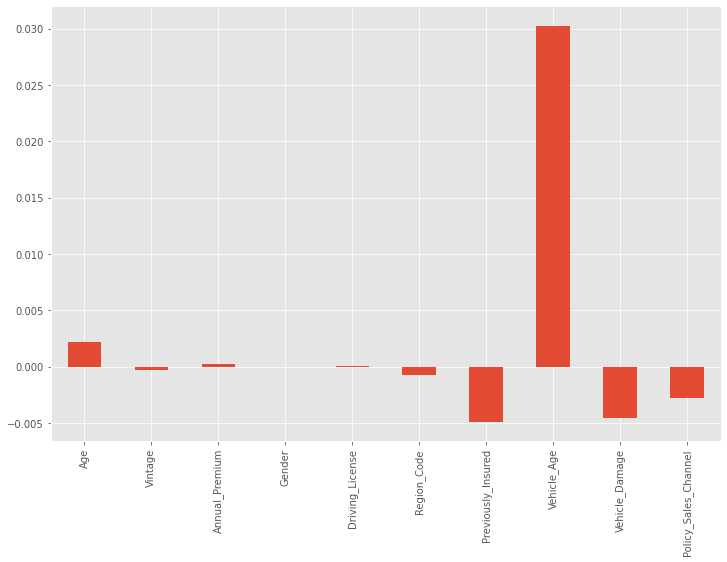

In [33]:
pd.Series(fs.importances_mean,index=X.columns).plot(kind='bar');

**Vehicle_Age, Previously_Insured, Vehicle_Damage and Policy_Sales_Channel are the most important features according to permutation importance**

# Algorithm Spot Checking

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [35]:
def get_models():
    
    names,model=[],[]
    
    model.append(GaussianNB())
    names.append('gnb')
    
    model.append(KNeighborsClassifier())
    names.append('knn')
    
    model.append(RandomForestClassifier())
    names.append('rf')
    
    model.append(XGBClassifier())
    names.append('xgb')
    
    return model,names

In [36]:
def evaluate(model,X,y):
    cv=StratifiedKFold(n_splits=5,shuffle=True, random_state=1)
    scores=cross_val_score(model,X,y,scoring='roc_auc',cv=cv)
    
    return scores

In [37]:
results=[]

models,names=get_models()

for i in range(len(models)):
    results.append(evaluate(models[i],X_train,y_train))

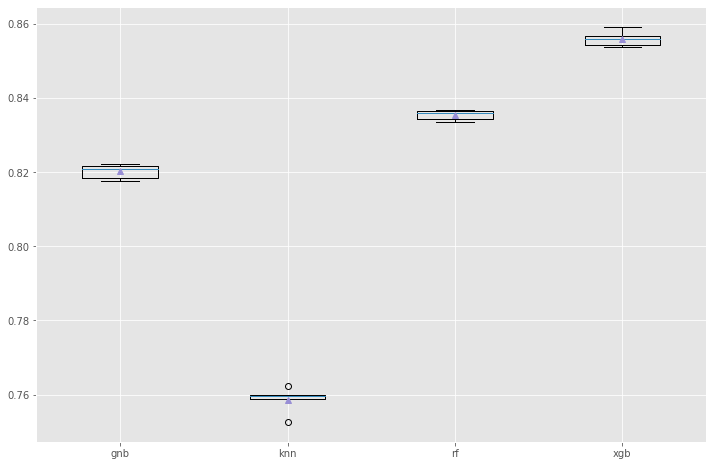

In [38]:
plt.figure(figsize=(12,8))
plt.boxplot(results,labels=names,showmeans=True);

**Xgboost performed best achieving an roc auc score of 0.86.**

In [39]:
model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [40]:
# no skill
ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

#Xgboost
y_probs=model.predict_proba(X_test)
fpr,tpr,thresholds=roc_curve(y_test,y_probs[:,1])

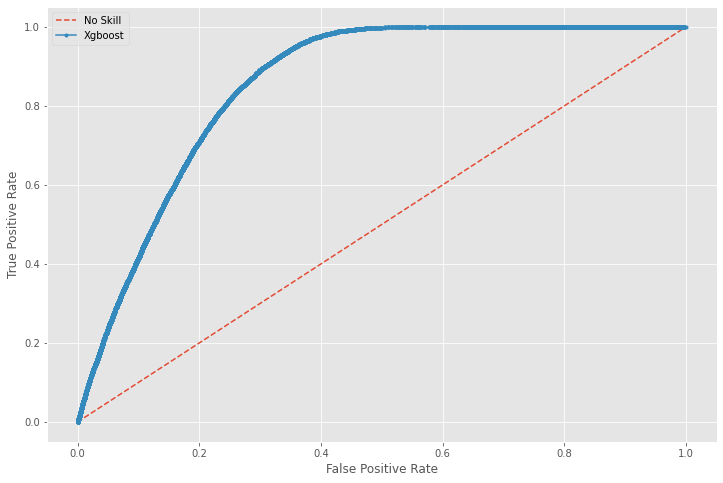

In [41]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Xgboost')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

In [42]:
print(f'Roc Score: {roc_auc_score(y_test,y_probs[:,1])}')

Roc Score: 0.8532627448299033


# Threshold Moving

In [43]:
# using gmeans( np.sqrt(tpr * (1-fpr))) to determine the optimal threshold
# alternatively we can also use Youden's J statistic (J=tpr-fpr)

gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
thresh=thresholds[ix]

print('Best Threshold=%f, G-mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.142307, G-mean=0.790


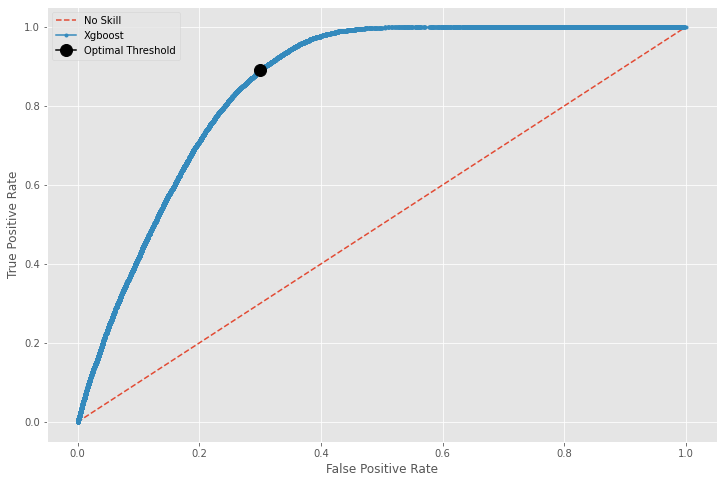

In [44]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill');
plt.plot(fpr, tpr, marker='.', label='Xgboost');
plt.plot(fpr[ix],tpr[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

In [45]:
y_pred=(y_probs[:,1]>=thresh)

In [46]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.98      0.70      0.82     66880
           1       0.29      0.89      0.44      9342

    accuracy                           0.72     76222
   macro avg       0.64      0.80      0.63     76222
weighted avg       0.89      0.72      0.77     76222



In [47]:
print(f'Classification_report: \n\n {confusion_matrix(y_test,y_pred)}')

Classification_report: 

 [[46779 20101]
 [ 1013  8329]]
